In [68]:
#laste ned pakkene jeg trenger
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
import pandas as pd
import requests
import sympy as sp
import math
from pyjstat import pyjstat
import csv
import requests
import io
import requests
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt


In [22]:
import pandas as pd

# URL of the CSV file
url = "https://github.com/EivindVold/sok-1006-eksamen/raw/main/eiendomsdata_2019_2023_studenter.csv"

# Use pandas to read the CSV file directly from the URL
df_eiendom = pd.read_csv(url, delimiter=",")


In [23]:
df_eiendom

,REGISTERENHETID,BRUKSENHETSID,SALGS_DOKUMENTAAR,SALGSBELOEP,BRUKSAREAL,POSTNUMMER,GATENAVN,BEBYGDAREAL,BRUKSENHETSTYPEKODE,ANTALLROM,DOKUMENTDATO
0,3129219,61167642,2019,0,160,9027,Breivikeidvegen,1,Bolig,4,20/02/2019
1,3126840,61076385,2023,0,59,9020,Arthur Arntzens veg,0,Bolig,2,28/08/2023
2,3145124,61029484,2020,8000000,0,9008,Grønnegata,0,UOPPGITT,0,04/09/2020
3,3124765,61121487,2019,990000,36,9023,Tønsvikdalen,0,Fritidsbolig,0,21/01/2019
4,4107518,60899075,2020,0,101,9013,Alaskasvingen,0,Bolig,3,15/07/2020
...,...,...,...,...,...,...,...,...,...,...,...
17766,1086867096,6451313273,2023,4500000,201,9107,Ropnesvegen,4,Annet en bolig,1,13/09/2023
17767,261570441,470951864,2022,1800000,58,9020,Storbakkvegen,853,Bolig,2,31/10/2022
17768,234272584,61005133,2023,3925000,89,9011,Ringkøbingvegen,0,Bolig,3,07/09/2023
17769,234272584,61005133,2023,3925000,89,9011,Ringkøbingvegen,0,Bolig,3,07/09/2023


In [24]:
# Filtrer DataFrame for å beholde kun rader hvor 'Bruksenhetstypekode' er 'bolig'
df_eiendom1= df_eiendom[df_eiendom['BRUKSENHETSTYPEKODE'] == 'Bolig']
df_eiendom1

,REGISTERENHETID,BRUKSENHETSID,SALGS_DOKUMENTAAR,SALGSBELOEP,BRUKSAREAL,POSTNUMMER,GATENAVN,BEBYGDAREAL,BRUKSENHETSTYPEKODE,ANTALLROM,DOKUMENTDATO
0,3129219,61167642,2019,0,160,9027,Breivikeidvegen,1,Bolig,4,20/02/2019
1,3126840,61076385,2023,0,59,9020,Arthur Arntzens veg,0,Bolig,2,28/08/2023
4,4107518,60899075,2020,0,101,9013,Alaskasvingen,0,Bolig,3,15/07/2020
6,500530230,575222187,2020,1200000,39,9006,Strandvegen,2970,Bolig,2,27/04/2020
7,234452389,60903157,2022,3160000,71,9020,Sommarfjøsvegen,2055,Bolig,3,12/01/2022
...,...,...,...,...,...,...,...,...,...,...,...
17764,3126965,61060629,2022,2500000,141,9020,Tønsnesvegen,0,Bolig,4,05/08/2022
17767,261570441,470951864,2022,1800000,58,9020,Storbakkvegen,853,Bolig,2,31/10/2022
17768,234272584,61005133,2023,3925000,89,9011,Ringkøbingvegen,0,Bolig,3,07/09/2023
17769,234272584,61005133,2023,3925000,89,9011,Ringkøbingvegen,0,Bolig,3,07/09/2023


In [25]:
# Fjern alle rader hvor 'Salgsbeloep' er 0
df_eiendom2 = df_eiendom1[df_eiendom1['SALGSBELOEP'] != 0]
df_eiendom2


,REGISTERENHETID,BRUKSENHETSID,SALGS_DOKUMENTAAR,SALGSBELOEP,BRUKSAREAL,POSTNUMMER,GATENAVN,BEBYGDAREAL,BRUKSENHETSTYPEKODE,ANTALLROM,DOKUMENTDATO
6,500530230,575222187,2020,1200000,39,9006,Strandvegen,2970,Bolig,2,27/04/2020
7,234452389,60903157,2022,3160000,71,9020,Sommarfjøsvegen,2055,Bolig,3,12/01/2022
8,234454962,60806288,2021,2200000,87,9020,Albertsvingen,0,Bolig,3,06/05/2021
9,234451772,61045788,2022,2450000,63,9018,Utsikten,0,Bolig,2,04/04/2022
11,3131747,61112973,2019,400000,215,9101,Rautindvegen,0,Bolig,4,12/12/2019
...,...,...,...,...,...,...,...,...,...,...,...
17764,3126965,61060629,2022,2500000,141,9020,Tønsnesvegen,0,Bolig,4,05/08/2022
17767,261570441,470951864,2022,1800000,58,9020,Storbakkvegen,853,Bolig,2,31/10/2022
17768,234272584,61005133,2023,3925000,89,9011,Ringkøbingvegen,0,Bolig,3,07/09/2023
17769,234272584,61005133,2023,3925000,89,9011,Ringkøbingvegen,0,Bolig,3,07/09/2023


In [38]:
# Fjern duplikater basert på 'Bruksenhetstid', 'Salgsbeløp', og 'Salgsår'
df_eiendom_total = df_eiendom2.drop_duplicates(subset=['BRUKSENHETSID', 'SALGSBELOEP', 'SALGS_DOKUMENTAAR', 'REGISTERENHETID']).copy()
df_eiendom_total

,REGISTERENHETID,BRUKSENHETSID,SALGS_DOKUMENTAAR,SALGSBELOEP,BRUKSAREAL,POSTNUMMER,GATENAVN,BEBYGDAREAL,BRUKSENHETSTYPEKODE,ANTALLROM,DOKUMENTDATO
6,500530230,575222187,2020,1200000,39,9006,Strandvegen,2970,Bolig,2,27/04/2020
7,234452389,60903157,2022,3160000,71,9020,Sommarfjøsvegen,2055,Bolig,3,12/01/2022
8,234454962,60806288,2021,2200000,87,9020,Albertsvingen,0,Bolig,3,06/05/2021
9,234451772,61045788,2022,2450000,63,9018,Utsikten,0,Bolig,2,04/04/2022
11,3131747,61112973,2019,400000,215,9101,Rautindvegen,0,Bolig,4,12/12/2019
...,...,...,...,...,...,...,...,...,...,...,...
17748,929781358,6256752790,2023,5640000,100,9019,Stakkevollvegen,392,Bolig,4,21/07/2023
17749,929781361,6256752791,2023,5840000,100,9019,Stakkevollvegen,392,Bolig,4,19/04/2023
17752,1044518555,6390271651,2023,3900000,78,9006,Strandvegen,1,Bolig,3,24/03/2023
17761,1085702406,6417974632,2023,12000000,268,9007,Henrik Ibsens veg,91,Bolig,6,18/08/2023


In [54]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/03013/"

In [55]:
# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her


apiQuery = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "vs:CoiCop2016niva1",
        "values": [
          "TOTAL"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KpiIndMnd"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08", "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10", "2022M11",
          "2022M12",
          "2023M01",
          "2023M02",
          "2023M03",
          "2023M04",
          "2023M05",
          "2023M06",
          "2023M07",
          "2023M08",
          "2023M09",
          "2023M10",
          "2023M11",
          "2023M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [56]:
# Funksjon for å konvertere uttrekket til 2 dataframes, tar 2 paramtre

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

In [57]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [58]:
kpi_df = df

kpi_df.head()

,konsumgruppe,statistikkvariabel,måned,value
0,Totalindeks,Konsumprisindeks (2015=100),2019M01,109.3
1,Totalindeks,Konsumprisindeks (2015=100),2019M02,110.2
2,Totalindeks,Konsumprisindeks (2015=100),2019M03,110.4
3,Totalindeks,Konsumprisindeks (2015=100),2019M04,110.8
4,Totalindeks,Konsumprisindeks (2015=100),2019M05,110.5


In [59]:
# gi nytt navn til KPI kolonne

kpi_df.rename(columns={'value': 'KPI'}, inplace=True)



# gjør måned om til samme format som i eiendomsdata mm/yyyy
kpi_df['måned'] = pd.to_datetime(kpi_df['måned'], format='%YM%m').dt.strftime('%m/%Y')
kpi_df.head()

,konsumgruppe,statistikkvariabel,måned,KPI
0,Totalindeks,Konsumprisindeks (2015=100),01/2019,109.3
1,Totalindeks,Konsumprisindeks (2015=100),02/2019,110.2
2,Totalindeks,Konsumprisindeks (2015=100),03/2019,110.4
3,Totalindeks,Konsumprisindeks (2015=100),04/2019,110.8
4,Totalindeks,Konsumprisindeks (2015=100),05/2019,110.5


In [61]:
# gjør dokumentdato om til mm/yyyy
# ny kolonne Salgsmåned
df_eiendom_total.loc[:, 'Salgsmåned'] = pd.to_datetime(df_eiendom_total['DOKUMENTDATO'], format='%d/%m/%Y').dt.strftime('%m/%Y')
df_eiendom_total.head()

,REGISTERENHETID,BRUKSENHETSID,SALGS_DOKUMENTAAR,SALGSBELOEP,BRUKSAREAL,POSTNUMMER,GATENAVN,BEBYGDAREAL,BRUKSENHETSTYPEKODE,ANTALLROM,DOKUMENTDATO,Salgsmåned
6,500530230,575222187,2020,1200000,39,9006,Strandvegen,2970,Bolig,2,27/04/2020,04/2020
7,234452389,60903157,2022,3160000,71,9020,Sommarfjøsvegen,2055,Bolig,3,12/01/2022,01/2022
8,234454962,60806288,2021,2200000,87,9020,Albertsvingen,0,Bolig,3,06/05/2021,05/2021
9,234451772,61045788,2022,2450000,63,9018,Utsikten,0,Bolig,2,04/04/2022,04/2022
11,3131747,61112973,2019,400000,215,9101,Rautindvegen,0,Bolig,4,12/12/2019,12/2019


In [62]:
# få riktig måned/år for salg tilpasset KPI fra samme måned
df_eiendom_total = df_eiendom_total.merge(kpi_df, left_on='Salgsmåned', right_on='måned', how='left')
df_eiendom_total.head()

,REGISTERENHETID,BRUKSENHETSID,SALGS_DOKUMENTAAR,SALGSBELOEP,BRUKSAREAL,POSTNUMMER,GATENAVN,BEBYGDAREAL,BRUKSENHETSTYPEKODE,ANTALLROM,DOKUMENTDATO,Salgsmåned,konsumgruppe,statistikkvariabel,måned,KPI
0,500530230,575222187,2020,1200000,39,9006,Strandvegen,2970,Bolig,2,27/04/2020,04/2020,Totalindeks,Konsumprisindeks (2015=100),04/2020,111.7
1,234452389,60903157,2022,3160000,71,9020,Sommarfjøsvegen,2055,Bolig,3,12/01/2022,01/2022,Totalindeks,Konsumprisindeks (2015=100),01/2022,117.8
2,234454962,60806288,2021,2200000,87,9020,Albertsvingen,0,Bolig,3,06/05/2021,05/2021,Totalindeks,Konsumprisindeks (2015=100),05/2021,114.9
3,234451772,61045788,2022,2450000,63,9018,Utsikten,0,Bolig,2,04/04/2022,04/2022,Totalindeks,Konsumprisindeks (2015=100),04/2022,121.2
4,3131747,61112973,2019,400000,215,9101,Rautindvegen,0,Bolig,4,12/12/2019,12/2019,Totalindeks,Konsumprisindeks (2015=100),12/2019,111.3


In [63]:
# nå kan vi prisjustere
# formel: pris i 2015 NOK = SALGSBELOEP*100/KPI

df_eiendom_total['JustBeløp'] = df_eiendom_total['SALGSBELOEP'] * (100 /df_eiendom_total['KPI'])

df_eiendom_total['JustBeløp'] = df_eiendom_total['JustBeløp'].astype(int) # sikre hele tall

df_eiendom_total.head()

,REGISTERENHETID,BRUKSENHETSID,SALGS_DOKUMENTAAR,SALGSBELOEP,BRUKSAREAL,POSTNUMMER,GATENAVN,BEBYGDAREAL,BRUKSENHETSTYPEKODE,ANTALLROM,DOKUMENTDATO,Salgsmåned,konsumgruppe,statistikkvariabel,måned,KPI,JustBeløp
0,500530230,575222187,2020,1200000,39,9006,Strandvegen,2970,Bolig,2,27/04/2020,04/2020,Totalindeks,Konsumprisindeks (2015=100),04/2020,111.7,1074306
1,234452389,60903157,2022,3160000,71,9020,Sommarfjøsvegen,2055,Bolig,3,12/01/2022,01/2022,Totalindeks,Konsumprisindeks (2015=100),01/2022,117.8,2682512
2,234454962,60806288,2021,2200000,87,9020,Albertsvingen,0,Bolig,3,06/05/2021,05/2021,Totalindeks,Konsumprisindeks (2015=100),05/2021,114.9,1914708
3,234451772,61045788,2022,2450000,63,9018,Utsikten,0,Bolig,2,04/04/2022,04/2022,Totalindeks,Konsumprisindeks (2015=100),04/2022,121.2,2021452
4,3131747,61112973,2019,400000,215,9101,Rautindvegen,0,Bolig,4,12/12/2019,12/2019,Totalindeks,Konsumprisindeks (2015=100),12/2019,111.3,359389


In [64]:
# trekk ut det som vi ønsker å bruke
data = df_eiendom_total[['SALGS_DOKUMENTAAR', 'SALGSBELOEP', 'BRUKSAREAL', 'POSTNUMMER', 'GATENAVN', 'ANTALLROM', 'Salgsmåned', 'JustBeløp']].copy()
data.head()

,SALGS_DOKUMENTAAR,SALGSBELOEP,BRUKSAREAL,POSTNUMMER,GATENAVN,ANTALLROM,Salgsmåned,JustBeløp
0,2020,1200000,39,9006,Strandvegen,2,04/2020,1074306
1,2022,3160000,71,9020,Sommarfjøsvegen,3,01/2022,2682512
2,2021,2200000,87,9020,Albertsvingen,3,05/2021,1914708
3,2022,2450000,63,9018,Utsikten,2,04/2022,2021452
4,2019,400000,215,9101,Rautindvegen,4,12/2019,359389


In [81]:
# gi nye navn
data.rename(columns={'SALGS_DOKUMENTAAR': 'År', 'SALGSBELOEP': 'Beløp', 
                     'BRUKSAREAL': 'Bruksareal', 'POSTNUMMER': 'Postnummer', 'GATENAVN': 'Gate', 'ANTALLROM': 'Rom',
                     'Salgsmåned': 'Måned/År', 'JustBeløp': 'Pris (fast)'}, inplace=True)
# data.head()
data['Gate'].nunique()
data

,År,Beløp,Bruksareal,Postnummer,Gate,Rom,Måned/År,Pris (fast),Pris (1000)
0,2020,1200000,39,9006,Strandvegen,2,04/2020,1074306,1074.306
1,2022,3160000,71,9020,Sommarfjøsvegen,3,01/2022,2682512,2682.512
2,2021,2200000,87,9020,Albertsvingen,3,05/2021,1914708,1914.708
3,2022,2450000,63,9018,Utsikten,2,04/2022,2021452,2021.452
4,2019,400000,215,9101,Rautindvegen,4,12/2019,359389,359.389
...,...,...,...,...,...,...,...,...,...
9886,2023,5640000,100,9019,Stakkevollvegen,4,07/2023,4308632,4308.632
9887,2023,5840000,100,9019,Stakkevollvegen,4,04/2023,4527131,4527.131
9888,2023,3900000,78,9006,Strandvegen,3,03/2023,3056426,3056.426
9889,2023,12000000,268,9007,Henrik Ibsens veg,6,08/2023,9237875,9237.875


In [66]:
data.loc[:, 'Pris (1000)'] = data['Pris (fast)'] / 1000


# beregn gjennomsnittspris per år
gj_pris_år = data.groupby('År')['Pris (1000)'].mean()



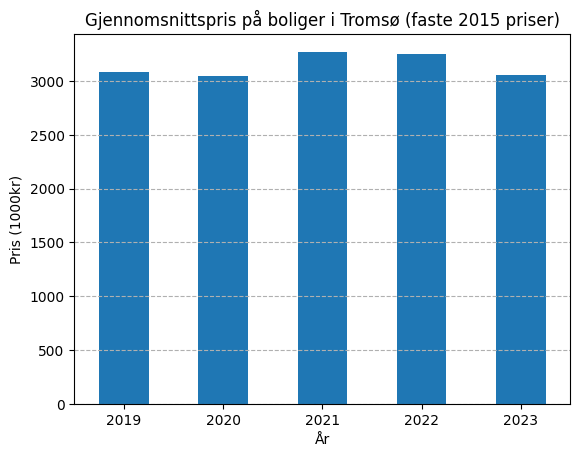

In [85]:
# plott
plt.figure()  
gj_pris_år.plot(kind='bar') 
plt.title('Gjennomsnittspris på boliger i Tromsø (faste 2015 priser)')  
plt.xlabel('År')  
plt.ylabel('Pris (1000kr)')  
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--')

plt.show()

In [82]:
df = pd.DataFrame(data)
# Grupper dataen etter "År" og tell antall boliger solgt per år
sales_per_year = df.groupby('År').size()

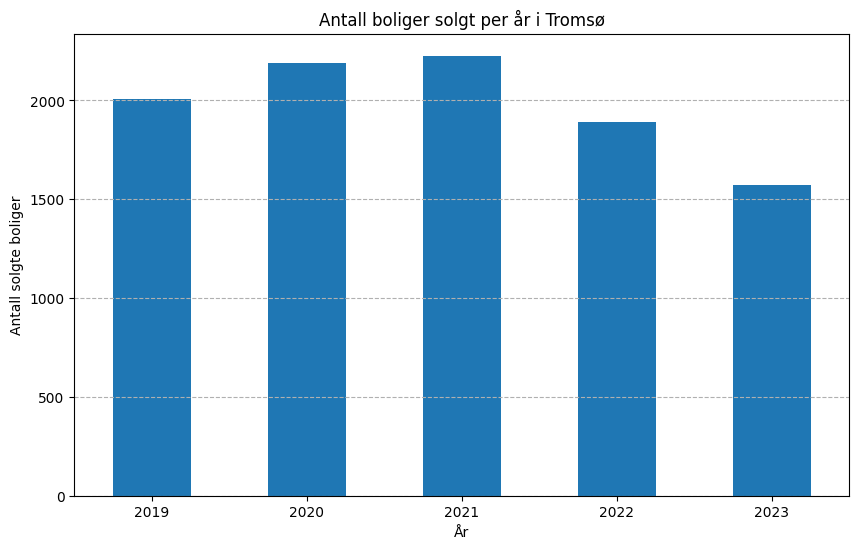

In [201]:
# Plot resultatene
plt.figure(figsize=(10, 6))
sales_per_year.plot(kind='bar')
plt.title('Antall boliger solgt per år i Tromsø')
plt.xlabel('År')
plt.ylabel('Antall solgte boliger')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [87]:
#viser alle postnummer i datasette
unique_postcodes = df['Postnummer'].unique()
unique_postcodes

array([9006, 9020, 9018, 9101, 9016, 9013, 9012, 9024, 9010, 9015, 9022,
       9008, 9009, 9102, 9027, 9007, 9105, 9014, 9017, 9120, 9109, 9104,
       9110, 9019, 9106, 9023, 9030, 9103, 9100, 9011, 9057, 9107, 9131,
       9034, 9021, 9108, 9118, 9043, 9128], dtype=int64)

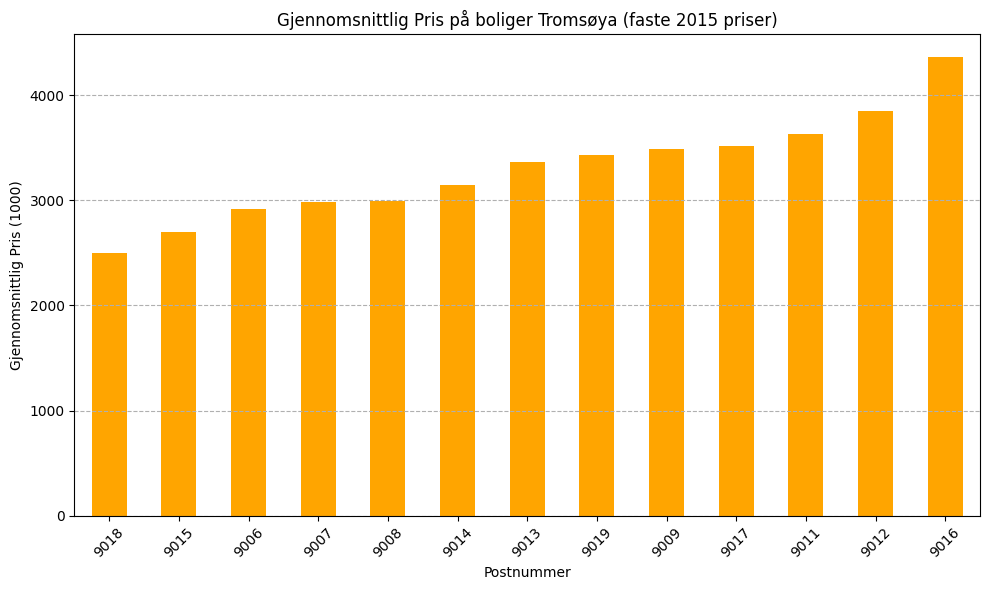

In [146]:
df_postnummer_corrected = data[data['Postnummer'].isin([9006, 9007, 9008, 9009, 9011,9012,9013,9014,9015,9016,9017,9018,9019])]

# Calculating average prices for these districts
average_prices_corrected = df_postnummer_corrected.groupby('Postnummer')['Pris (1000)'].mean().sort_values()

# Plotting for the correctly filtered districts
plt.figure(figsize=(10, 6))
average_prices_corrected.plot(kind='bar', color='orange')
plt.title('Gjennomsnittlig Pris på boliger Tromsøya (faste 2015 priser)')
plt.xlabel('Postnummer')
plt.ylabel('Gjennomsnittlig Pris (1000)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

C:\Users\kalle\AppData\Local\Temp\ipykernel_34884\4131101381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_postnummer_corrected.loc[:, 'Pris per kvadratmeter'] = df_postnummer_corrected['Pris (1000)'] * 1000 / df_postnummer_corrected['Bruksareal']


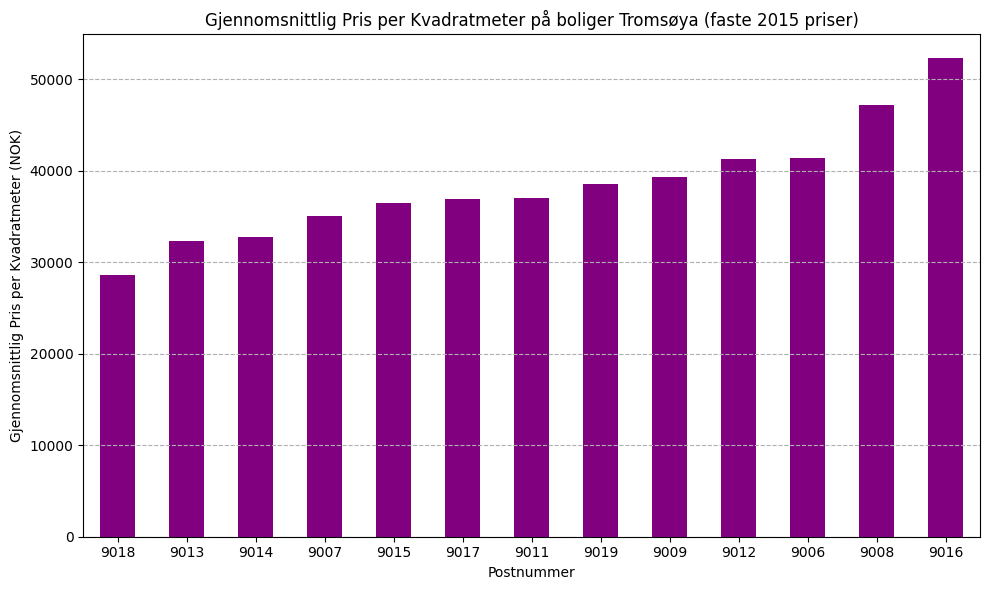

In [147]:
# To address the warning and ensure all districts are shown, let's recreate the dataframe and recompute the values properly.

# First, creating a new dataframe with the corrected postal codes as per the user's dataset
df_postnummer_corrected = data[data['Postnummer'].isin([9006, 9007, 9008, 9009, 9011,9012,9013,9014,9015,9016,9017,9018,9019])]

# Now, we'll use the proper method to avoid SettingWithCopyWarning
df_postnummer_corrected.loc[:, 'Pris per kvadratmeter'] = df_postnummer_corrected['Pris (1000)'] * 1000 / df_postnummer_corrected['Bruksareal']

# Calculating average price per square meter for these districts
average_price_per_sqm_corrected = df_postnummer_corrected.groupby('Postnummer')['Pris per kvadratmeter'].mean().sort_values()

# Plotting average price per square meter for the corrected districts
plt.figure(figsize=(10, 6))
average_price_per_sqm_corrected.plot(kind='bar', color='purple')
plt.title('Gjennomsnittlig Pris per Kvadratmeter på boliger Tromsøya (faste 2015 priser)')
plt.xlabel('Postnummer')
plt.ylabel('Gjennomsnittlig Pris per Kvadratmeter (NOK)')
plt.xticks(rotation=0)  # Rotation set to 0 for better label readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout()  # Adjust layout to fit everything neatly

plt.show()


C:\Users\kalle\AppData\Local\Temp\ipykernel_34884\3700209612.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(monthly_price_named.index, rotation=45)
C:\Users\kalle\AppData\Local\Temp\ipykernel_34884\3700209612.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(monthly_sales_count_named.index, rotation=45)


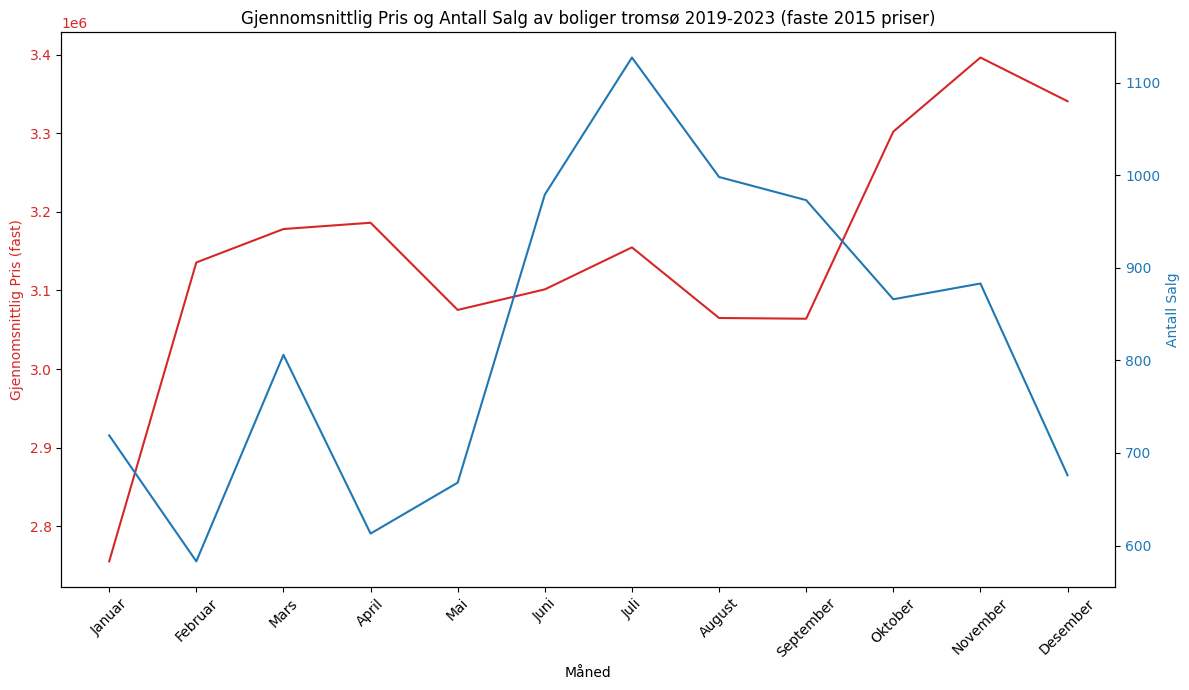

In [148]:
# Mapping the month integers to actual month names
month_names = {1: 'Januar', 2: 'Februar', 3: 'Mars', 4: 'April', 5: 'Mai', 6: 'Juni',
               7: 'Juli', 8: 'August', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
data['Måned Navn'] = data['Måned'].map(month_names)

# Grouping by month name to get average price and count of sales for each month
monthly_price_named = data.groupby('Måned Navn')['Pris (fast)'].mean().reindex(month_names.values())
monthly_sales_count_named = data.groupby('Måned Navn').size().reindex(month_names.values())

# Setting up the plot with month names
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotting average price by month with names
color = 'tab:red'
ax1.set_xlabel('Måned')
ax1.set_ylabel('Gjennomsnittlig Pris (fast)', color=color)
ax1.plot(monthly_price_named.index, monthly_price_named.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(monthly_price_named.index, rotation=45)

# Creating a twin axis to plot the count of sales with names
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Antall Salg', color=color)
ax2.plot(monthly_sales_count_named.index, monthly_sales_count_named.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticklabels(monthly_sales_count_named.index, rotation=45)

# Adding title and configuring the grid
plt.title('Gjennomsnittlig Pris og Antall Salg av boliger tromsø 2019-2023 (faste 2015 priser)')
fig.tight_layout()

plt.show()


In [200]:
# Definerte budsjetter for hvert år
budsjett_per_år = {
    2019: 2690000,
    2020: 2720000,
    2021: 2880000,
    2022: 3010000,
    2023: 3070000,
}

# Beregner sykepleierindeksen for hvert år
resultat = {}
for år, budsjett in budsjett_per_år.items():
    boliger_i_år = data[data["År"] == år]
    råd_til = boliger_i_år[boliger_i_år["Beløp"] <= budsjett]
    if len(boliger_i_år) > 0:
        indeks = (len(råd_til) / len(boliger_i_år)) *100
    else:
        indeks = 0  # Unngår deling med null hvis det ikke er noen boliger det året
    resultat[år] = indeks

# Viser resultatene
for år, indeks in resultat.items():
    print(f"Sykepleierindeksen for {år}: {indeks:.2f}%")

Sykepleierindeksen for 2019: 36.54%
Sykepleierindeksen for 2020: 40.30%
Sykepleierindeksen for 2021: 33.29%
Sykepleierindeksen for 2022: 35.45%
Sykepleierindeksen for 2023: 35.56%


ValueError: Image size of 1003538x15507 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

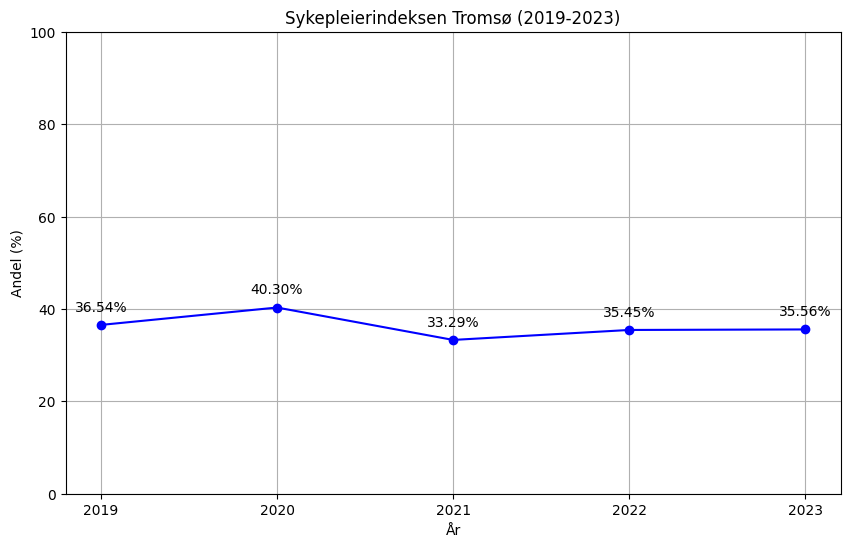

In [199]:
# Budsjett for hvert år
budsjett_per_år = {
    2019: 2690000,
    2020: 2720000,
    2021: 2880000,
    2022: 3010000,
    2023: 3070000,
}

# Beregner andelen av boliger innenfor budsjettet for hvert år for hele datasettet
resultat = {}
for år, budsjett in budsjett_per_år.items():
    boliger_i_år = data[data['År'] == år]
    råd_til = boliger_i_år[boliger_i_år['Beløp'] <= budsjett]
    if len(boliger_i_år) > 0:
        indeks = (len(råd_til) / len(boliger_i_år)) * 100
    else:
        indeks = 0
    resultat[år] = indeks

# Viser resultatene i en graf
år = list(resultat.keys())
indekser = list(resultat.values())

# Bruker text-funksjonen for mer kontrollert plassering
for i in range(len(år)):
    plt.text(år[i], indekser[i] + 1.5, f'{indekser[i]}%', ha='center', va='bottom')

plt.figure(figsize=(10, 6))
plt.plot(år, indekser, marker='o', linestyle='-', color='b')

# Legger til tekst for hver data-punkt for å vise prosentandelen
for i, txt in enumerate(indekser):
    plt.annotate(f"{txt:.2f}%", (år[i], indekser[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Sykepleierindeksen Tromsø (2019-2023)')
plt.xlabel('År')
plt.ylabel('Andel (%)')
plt.grid(True)
plt.xticks(år)
plt.ylim(0, 100)  # Justerer for å sikre at annoteringene vises tydelig
plt.show()

In [179]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/en/table/07230/"

In [180]:
apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "item",
        "values": [
          "001",
          "003",
          "004",
          "011"
        ]
      }
    },
    {
      "code": "Boligtype",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2019",
          "2020",
          "2021",
          "2022",
          "2023"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [190]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds1 = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df1 = ds1.write('dataframe')
    # deretter dataframe med koder
    df_id1 = ds1.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df1, df_id1, ds1

In [192]:
df1, df_id1, ds1 = apiToDataframe(postUrl, apiQuery)

In [194]:
kpi_df1 = df1

kpi_df1

,region,type of dwelling,contents,year,value
0,Oslo including Bærum,Total,Price index for existing dwellings,2019,130.4
1,Oslo including Bærum,Total,Price index for existing dwellings,2020,137.3
2,Oslo including Bærum,Total,Price index for existing dwellings,2021,152.1
3,Oslo including Bærum,Total,Price index for existing dwellings,2022,158.9
4,Oslo including Bærum,Total,Price index for existing dwellings,2023,157.4
5,Bergen,Total,Price index for existing dwellings,2019,105.5
6,Bergen,Total,Price index for existing dwellings,2020,111.0
7,Bergen,Total,Price index for existing dwellings,2021,120.4
8,Bergen,Total,Price index for existing dwellings,2022,126.6
9,Bergen,Total,Price index for existing dwellings,2023,126.0


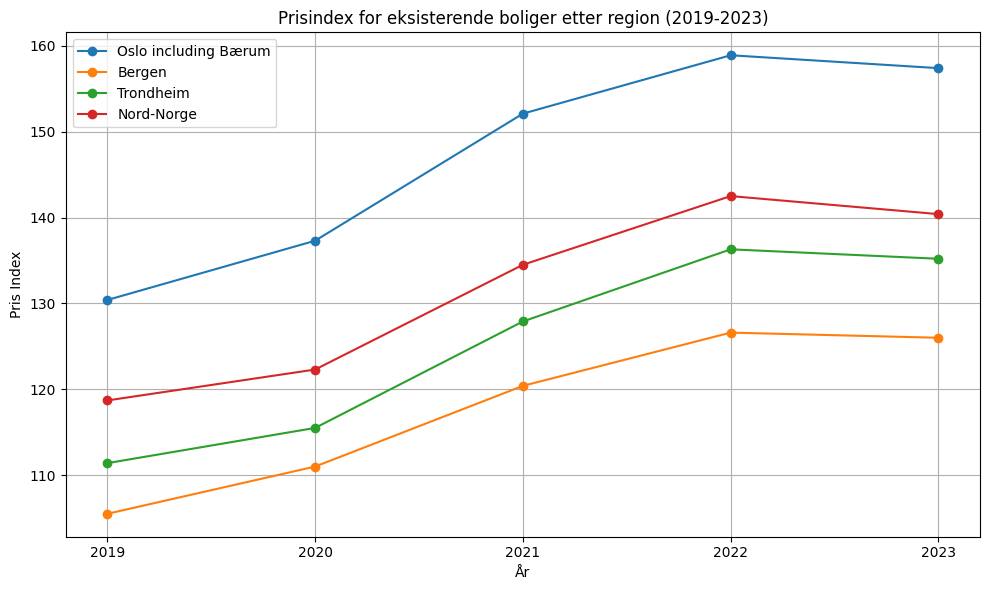

In [198]:
# Plotting
plt.figure(figsize=(10, 6))

for region in df1['region'].unique():
    subset = df1[df1['region'] == region]
    plt.plot(subset['year'], subset['value'], marker='o', label=region)

plt.title('Prisindex for eksisterende boliger etter region (2019-2023)')
plt.xlabel('År')
plt.ylabel('Pris Index')
plt.legend()
plt.grid(True)
plt.xticks(df1['year'].unique())
plt.tight_layout()

plt.show()

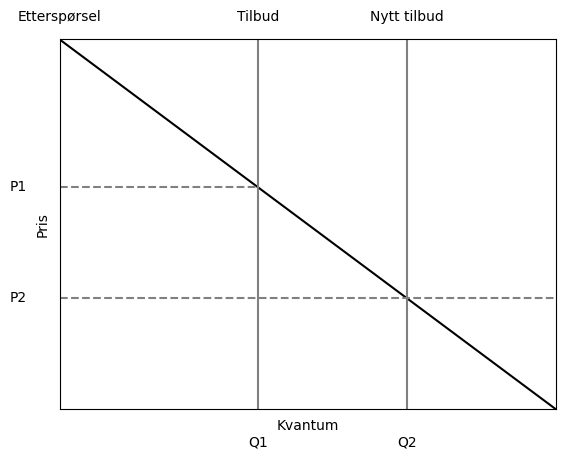

In [250]:

# Values for the demand line
Q = np.array([0, 100])
P = np.array([100, 0])

# Plotting the demand line
plt.plot(Q, P, label='Etterspørsel', color='black')

# Lines for 'Tilbud' and 'Nytt tilbud'
plt.axvline(x=40, color='grey', linestyle='-')
plt.axvline(x=70, color='grey', linestyle='-')

# Add horizontal line for P2
plt.axhline(y=30, xmin=0, xmax=70,color='grey', linestyle='--')

# Add horizontal line for P1 only until the first supply line
plt.hlines(y=60, xmin=0, xmax=40, color='grey', linestyle='--')

# Text for 'Tilbud' and 'Nytt tilbud'
plt.text(40, 105, 'Tilbud', horizontalalignment='center')
plt.text(70, 105, 'Nytt tilbud', horizontalalignment='center')
plt.text(0, 105, 'Etterspørsel', horizontalalignment='center')

# Text for 'Pris', 'Kvantum', 'P1', and 'P2'
plt.text(-10, 60, 'P1', verticalalignment='center')
plt.text(-10, 30, 'P2', verticalalignment='center')
plt.text(40, -10, 'Q1', horizontalalignment='center')
plt.text(70, -10, 'Q2', horizontalalignment='center')
plt.xlabel('Kvantum')
plt.ylabel('Pris')

# Set limits for better control over layout
plt.xlim(0, 100)
plt.ylim(0, 100)

# Adding grid
plt.grid(True)
# Removing the numbers from the axes
plt.xticks([])
plt.yticks([])

# Show plot
plt.show()

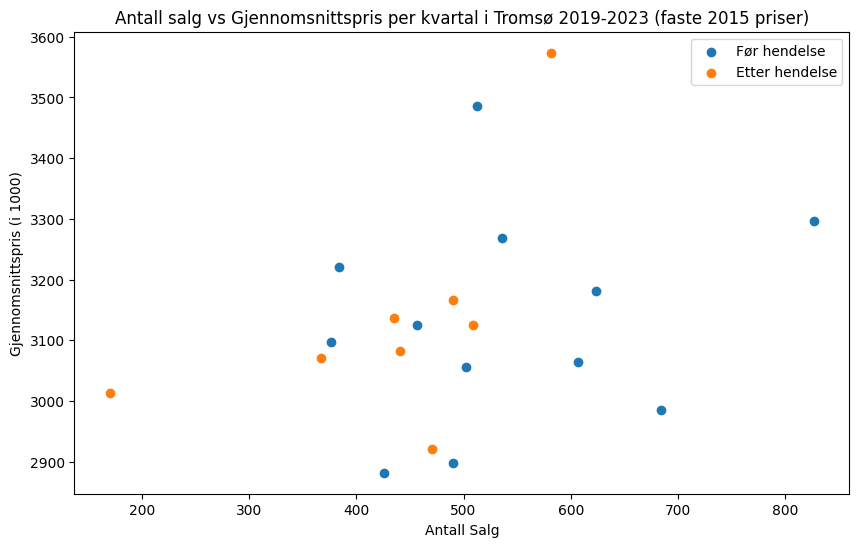

In [259]:
# Konverterer Måned/År til en dato-type for å enklere håndtere kvartalene
data['Måned/År'] = pd.to_datetime(data['Måned/År'], format='%m/%Y')
data['Kvartal'] = data['Måned/År'].dt.to_period('Q')

# Gruppere data etter kvartal og beregne gjennomsnittspris og antall salg
kvartals_data = data.groupby('Kvartal').agg(
    Antall_Salg=('Pris (1000)', 'count'),
    Gjennomsnittspris=('Pris (1000)', 'mean')
).reset_index()

# La oss si en hendelse fant sted i begynnelsen av 2022 (Q1 2022)
kvartals_data['Etter_Hendelse'] = kvartals_data['Kvartal'] >= '2022Q1'

# Plotte dataene
plt.figure(figsize=(10, 6))
for etter_hendelse, gruppe in kvartals_data.groupby('Etter_Hendelse'):
    plt.scatter(gruppe['Antall_Salg'], gruppe['Gjennomsnittspris'], label='Etter hendelse' if etter_hendelse else 'Før hendelse')

plt.title('Antall salg vs Gjennomsnittspris per kvartal i Tromsø 2019-2023 (faste 2015 priser)')
plt.xlabel('Antall Salg')
plt.ylabel('Gjennomsnittspris (i 1000)')
plt.legend()
plt.show()